In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


# CIFAR-10 Object recognition Using Transfer Learning

## Importing packages and Libraries

In [2]:
import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

### Reading Dataset

In [3]:
label_df = pd.read_csv("/kaggle/input/cifar-10/trainLabels.csv")

In [4]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [5]:
label_df.shape

(50000, 2)

In [6]:
label_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [7]:
label_df[label_df['id'] == 100]

,id,label
99,100,automobile


In [8]:
label_df[label_df['id'] == 2674]

,id,label
2673,2674,deer


### Label Encoding

In [9]:
label_dictionary = {'airplane':0 , 'automobile':1 , 'bird':2 , 'cat':3 , 'deer':4 , 'dog':5 , 'frog':6 , 'horse':7 , 
                   'ship':8 , 'truck':9 }
labels = [label_dictionary[i] for i in label_df['label']]

In [10]:
print(labels[0:5])

[6, 9, 9, 4, 1]


### Verifying Data

In [11]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 15.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 60.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


In [12]:
# Extracting files from archive
import py7zr

# path of .7z file 
file_Path  = '/kaggle/input/cifar-10/train.7z'
# destination directory
output_dir = '/kaggle/working/'

with py7zr.SevenZipFile(file_Path , mode='r') as z:
    z.extractall(output_dir)


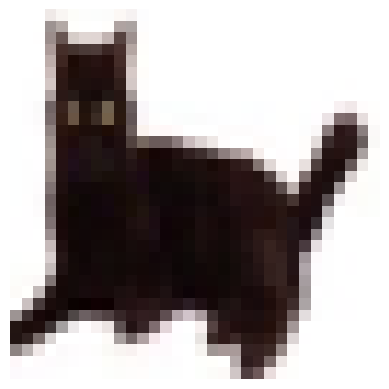

In [13]:
# displaying sample image
import cv2

def cv2_imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Converts the image from the BGR color space to the RGB color space.
    plt.axis('off')  # Turns off the axis labels and ticks in the plot
    plt.show()

img_path = '/kaggle/working/train/4565.png'
img = cv2.imread(img_path)

cv2_imshow(img)


In [14]:
label_df[label_df['id'] == 4565]

,id,label
4564,4565,cat


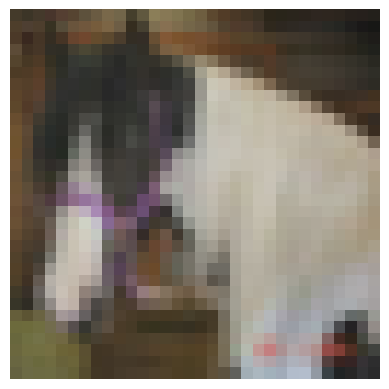

In [15]:
# displaying sample image
import cv2

def cv2_imshow(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #This line converts the image from the BGR color space to the RGB color space.
    plt.axis('off')  # This line turns off the axis labels and ticks in the plot
    plt.show()

img_path = '/kaggle/working/train/7354.png'
img = cv2.imread(img_path)

cv2_imshow(img)

In [16]:
label_df[label_df['id'] == 7354]

,id,label
7353,7354,horse


In [17]:
# Creating a list if id
id_list = list(label_df['id'])

### Image Preprocessing

In [18]:
# making a numpy array of images of training data
image_data_folder = '/kaggle/working/train/'
image_data = []

for id in id_list:
    image = Image.open(image_data_folder + str(id) + '.png')
    image = np.array(image)
    image_data.append(image)

In [19]:
print('Type of image_data: ' ,type(image_data))
print('--------------------------------------')
print('No. of images: ' , len(image_data))
print('--------------------------------------')
print('Type of Image: ' , type(image))
print('--------------------------------------')
print('Shape of the Image: ', image.shape)
print('--------------------------------------')

Type of image_data:  <class 'list'>
--------------------------------------
No. of images:  50000
--------------------------------------
Type of Image:  <class 'numpy.ndarray'>
--------------------------------------
Shape of the Image:  (32, 32, 3)
--------------------------------------


In [20]:
# assigning and converting feature and targets into numpy array
x = np.array(image_data)
y  =np.array(labels)

In [21]:
print(x.shape, ' -- x shape')
print(y.shape, '           -- y shape ')

(50000, 32, 32, 3)  -- x shape
(50000,)            -- y shape 


### **Train - Test Split**

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

In [23]:
print(x.shape , x_train.shape , x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


### Scaling Data

In [24]:
# Scale the pixel values of the training data
x_train = x_train / 255             # 255 is the maximum pixel value 
                                    #  Dividing by 255 scales the pixel values so that they range from 0 to 1.
# Scale the pixel values of the test data
x_test = x_test / 255


### Building a simple neural network model

In [25]:
import tensorflow as tf
from tensorflow import keras

2024-05-24 09:54:23.343278: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-24 09:54:23.343389: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-24 09:54:23.504054: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [26]:
no_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(58,activation='relu'),
    keras.layers.Dense(no_of_classes , activation='softmax')
])

model.compile(optimizer= 'adam',
             loss= 'sparse_categorical_crossentropy',
             metrics= ['acc'])

model.fit(x_train , y_train , epochs=10)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
  79/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.1561 - loss: 2.3230

I0000 00:00:1716544478.975846     134 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1716544478.990718     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.2655 - loss: 2.0358
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3472 - loss: 1.8245
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3783 - loss: 1.7519
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3846 - loss: 1.7260
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3894 - loss: 1.7187
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.3985 - loss: 1.6979
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4072 - loss: 1.6807
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4051 - loss: 1.6665
Epoch 9/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4064 - loss: 1.6668
Epoch 10/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4140 - loss: 1.6542


 
**Our current neural network is struggling to achieve satisfactory accuracy. To enhance our model's performance, we'll leverage a technique called Transfer Learning. This involves harnessing the knowledge gained by pre-trained models such as ResNet, EfficientNet, and MobileNet, which have been trained on extensive datasets. By incorporating these well-learned features into our own model, we can expedite the learning process and potentially achieve better accuracy.**

### Importing pre-trained model and packages for model

In [27]:
from tensorflow.keras import Sequential , layers , models
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense , Dropout , Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB0 
from tensorflow.keras.applications import mobilenet

## RestNet50

In [28]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [29]:
no_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='softmax'))

In [30]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])


In [31]:
history = model.fit(x_train, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 462s 350ms/step - acc: 0.6220 - loss: 1.1475 - val_acc: 0.8315 - val_loss: 0.5138
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9193 - loss: 0.2748 - val_acc: 0.9112 - val_loss: 0.2895
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9709 - loss: 0.1218 - val_acc: 0.9160 - val_loss: 0.2618
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9888 - loss: 0.0597 - val_acc: 0.9103 - val_loss: 0.2734
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9929 - loss: 0.0382 - val_acc: 0.9205 - val_loss: 0.2576
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 345ms/step - acc: 0.9964 - loss: 0.0242 - val_acc: 0.9317 - val_loss: 0.2381
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9967 - loss: 0.0190 - val_acc: 0.9265 - val_loss: 0.2358
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 389s 346ms/step - acc: 0.9973 - loss: 0.0165 - val_acc: 0.9275 - val_loss: 0.2643
Epoch 9/

In [32]:
loss , accuracy = model.evaluate(x_test  ,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - acc: 0.9276 - loss: 0.2593


In [33]:
print('Accuracy: ',accuracy)

Accuracy:  0.9273999929428101


In [34]:
model.save('/kaggle/working/resnet_trained_model.keras')

## EfficientNetB0

In [35]:
convolutional_base_model_1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base_model_1.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 256, 256,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 256, 256,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 256, 256,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 257, 257,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 128, 128,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 128, 128,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 128, 128,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 128, 128,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 128, 128,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 128, 128,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 128, 128,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 128, 128,  │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [36]:
no_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base_model_1)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='softmax'))

In [37]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

In [38]:
model.fit(x_train , y_train , validation_split=0.1 , epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 279s 165ms/step - acc: 0.5393 - loss: 1.4034 - val_acc: 0.8500 - val_loss: 0.4720
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 178s 158ms/step - acc: 0.8667 - loss: 0.4348 - val_acc: 0.8945 - val_loss: 0.3395
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 177s 158ms/step - acc: 0.9278 - loss: 0.2511 - val_acc: 0.9020 - val_loss: 0.3042
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 178s 158ms/step - acc: 0.9562 - loss: 0.1628 - val_acc: 0.9112 - val_loss: 0.2791
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 177s 157ms/step - acc: 0.9742 - loss: 0.1093 - val_acc: 0.9165 - val_loss: 0.2686
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 177s 158ms/step - acc: 0.9807 - loss: 0.0809 - val_acc: 0.9115 - val_loss: 0.2830
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 177s 158ms/step - acc: 0.9870 - loss: 0.0600 - val_acc: 0.9227 - val_loss: 0.2540
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 202s 158ms/step - acc: 0.9885 - loss: 0.0490 - val_acc: 0.9255 - val_loss: 0.2440
Epoch 9/

In [39]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 70ms/step - acc: 0.9292 - loss: 0.2419


In [40]:
print('Accuracy: ',accuracy)

Accuracy:  0.9296000003814697


In [41]:
model.save('/kaggle/working/efficientnet_trained_model.keras')

## MobileNet

In [42]:
from tensorflow.keras.applications import MobileNet
convolutional_base_model_2 = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
convolutional_base_model_2.summary()

/tmp/ipykernel_34/1154019159.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  convolutional_base_model_2 = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 128, 128, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 128, 128, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 128, 128, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 128, 128, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 129, 129, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 64, 64, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 64, 64, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 64, 64, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 64, 64, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [43]:
no_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base_model_2)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0,5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(no_of_classes, activation='softmax'))

In [44]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), 
              loss='sparse_categorical_crossentropy', 
              
              metrics=['acc'])

In [45]:
model.fit(x_train , y_train , validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 164s 118ms/step - acc: 0.5605 - loss: 1.3181 - val_acc: 0.8303 - val_loss: 0.5253
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.8799 - loss: 0.4057 - val_acc: 0.8630 - val_loss: 0.4312
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9464 - loss: 0.2198 - val_acc: 0.8687 - val_loss: 0.3966
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9770 - loss: 0.1243 - val_acc: 0.8765 - val_loss: 0.3843
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9913 - loss: 0.0721 - val_acc: 0.8783 - val_loss: 0.3733
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9946 - loss: 0.0477 - val_acc: 0.8830 - val_loss: 0.3745
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9966 - loss: 0.0341 - val_acc: 0.8848 - val_loss: 0.3630
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 129s 115ms/step - acc: 0.9977 - loss: 0.0255 - val_acc: 0.8808 - val_loss: 0.3785
Epoch 9/

In [46]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - acc: 0.8754 - loss: 0.4164


In [47]:
print('Accuracy: ',accuracy)

Accuracy:  0.8787999749183655


In [48]:
model.save('/kaggle/working/mobilenet_trained_model.keras')